In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# Ensure plots are displayed inline (for Jupyter Notebook users)
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
# Suppress warnings for clarity
warnings.filterwarnings('ignore')

In [2]:
# File path - update this to the correct path of your file
file_path = r"C:\Users\esthe\bankruptcy-prevention(2730).xlsx"

# Load the dataset
data = pd.read_excel(file_path)

# Split the single column based on the semicolon to create separate columns
data = data.iloc[:, 0].str.split(';', expand=True)

In [3]:
# Rename the columns based on the dataset description
data.columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 
                'credibility', 'competitiveness', 'operating_risk', 'class']

# Convert the numeric columns to floats
numeric_columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 
                   'credibility', 'competitiveness', 'operating_risk']

data[numeric_columns] = data[numeric_columns].astype(float)

# Encode the target variable ('class') to numeric values
data['class'] = data['class'].map({'non-bankruptcy': 0, 'bankruptcy': 1})

In [4]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1


In [5]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,0
246,1.0,1.0,0.5,1.0,1.0,0.0,0
247,0.0,1.0,1.0,0.5,0.5,0.0,0
248,1.0,0.0,0.5,1.0,0.5,0.0,0
249,1.0,0.0,0.5,0.5,1.0,1.0,0


In [6]:
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.8 KB
None


In [7]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       industrial_risk  management_risk  financial_flexibility  credibility  \
count       250.000000       250.000000             250.000000   250.000000   
mean          0.518000         0.614000               0.376000     0.470000   
std           0.411526         0.410705               0.401583     0.415682   
min           0.000000         0.000000               0.000000     0.000000   
25%           0.000000         0.500000               0.000000     0.000000   
50%           0.500000         0.500000               0.500000     0.500000   
75%           1.000000         1.000000               0.500000     1.000000   
max           1.000000         1.000000               1.000000     1.000000   

       competitiveness  operating_risk       class  
count       250.000000      250.000000  250.000000  
mean          0.476000        0.570000    0.428000  
std           0.440682        0.434575    0.495781  
min           0.000000        0.000000    0.000000  
25

In [8]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64


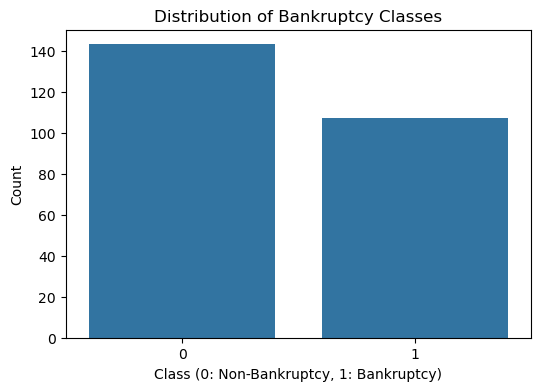

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Distribution of Bankruptcy Classes')
plt.xlabel('Class (0: Non-Bankruptcy, 1: Bankruptcy)')
plt.ylabel('Count')
plt.show()

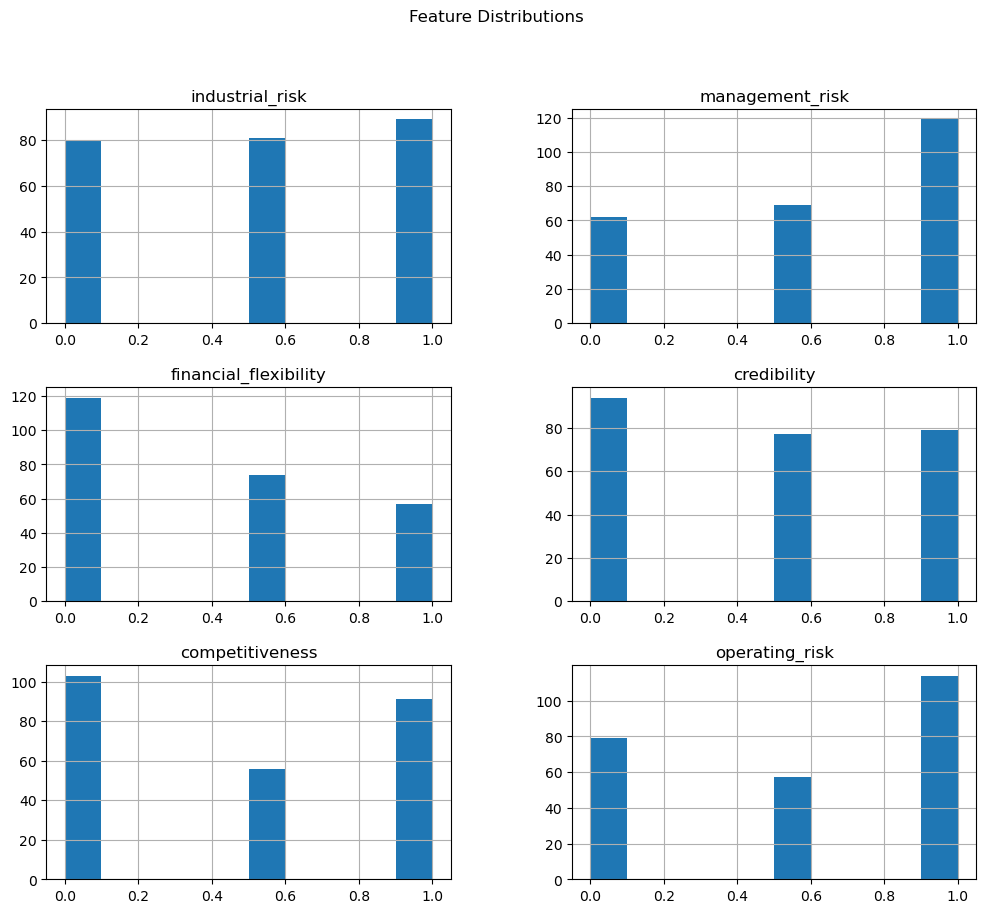

In [10]:
# Visualize the distribution of features using histograms
data[numeric_columns].hist(bins=10, figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

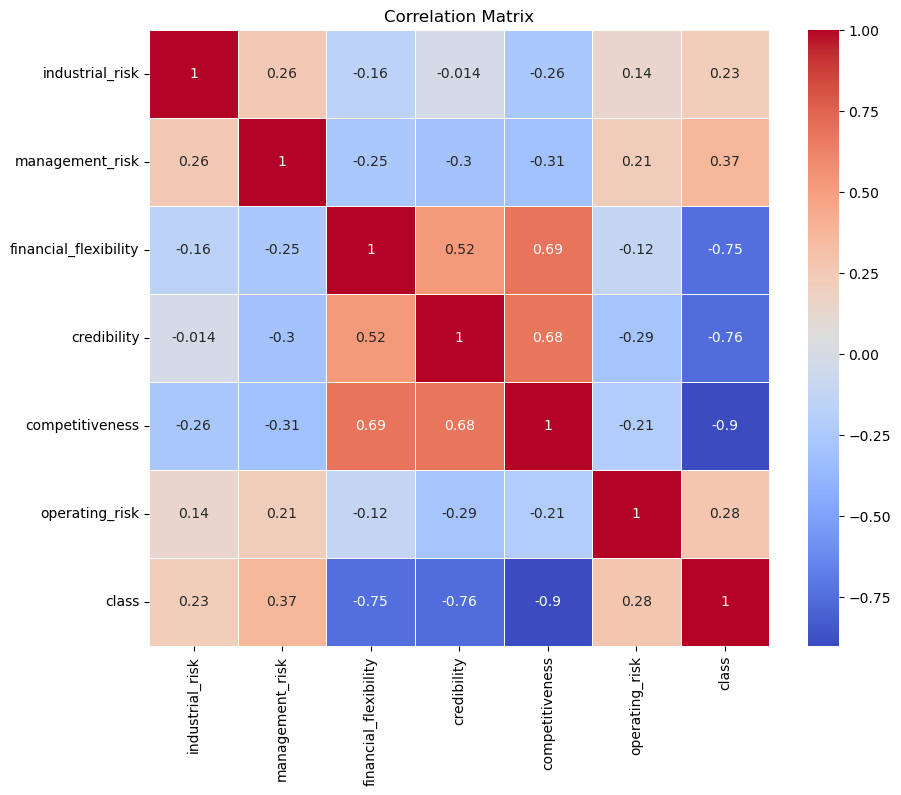

In [11]:
# Visualize the correlation between features
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Splitting the data into features (X) and target (y)
X = data[numeric_columns]
y = data['class']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}


Model: Logistic Regression
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



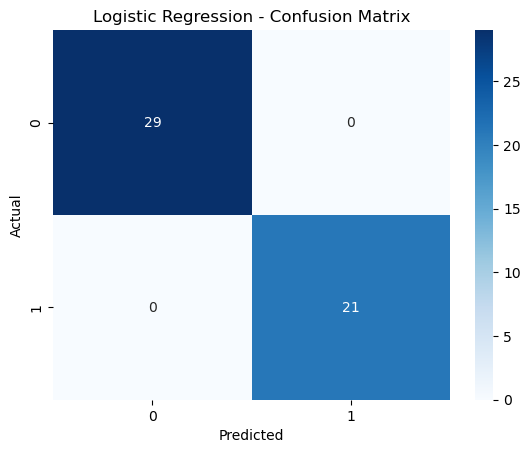


Model: Decision Tree
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.95      1.00      0.98        21

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



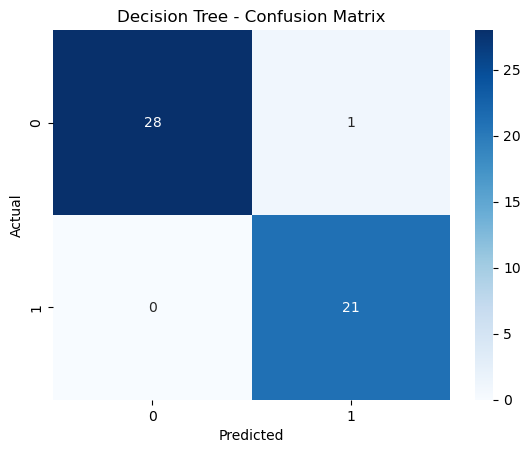


Model: Random Forest
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



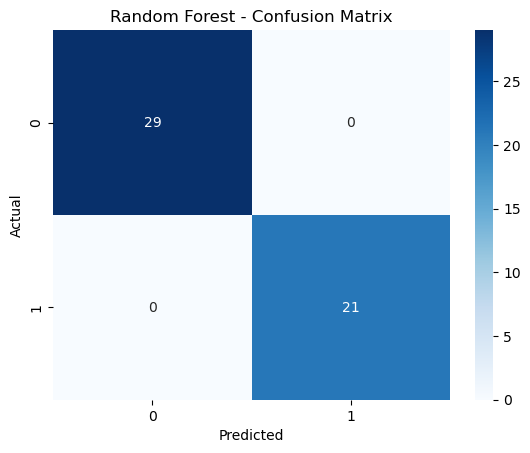


Model: Support Vector Machine
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        21

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



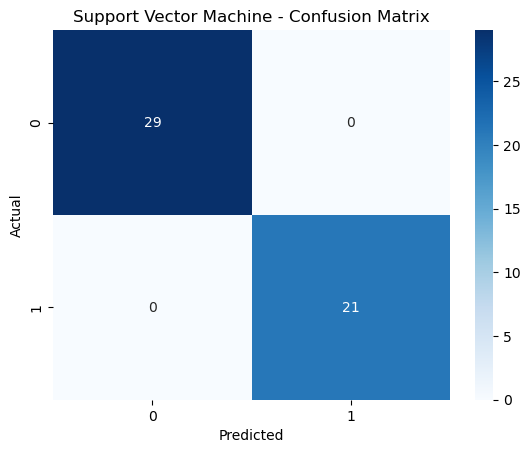

In [15]:
# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [16]:
# Based on evaluation metrics, Random Forest
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
import joblib
joblib.dump(best_model, 'bankruptcy_model.pkl')
print("Model training completed and saved as 'bankruptcy_model.pkl'.")

Model training completed and saved as 'bankruptcy_model.pkl'.


In [18]:
import os
# Check if the model file exists before trying to load it
model_path = 'bankruptcy_model.pkl'  # Ensure the path is correct
if os.path.exists(model_path):
    model = joblib.load(model_path)
else:
    raise FileNotFoundError(f"Model file {model_path} not found.")